# Bad Pixel Masks

* I am creating bad pixel masks for the WFC@INT.
* This has 4 ccds - making mask for each ccd.
* The mask is created from the ratio of two flats.  The flats are from May 2019.
* The data are stored on my laptop in /home/rfinn/data/ccdmask-test

In [39]:
import os
from matplotlib import pyplot as plt
from astropy import units as u
from astropy.nddata import CCDData

In [2]:
os.chdir('/home/rfinn/data/ccdmask-test/')

In [40]:
!ls

inactive			     WFC.r.2019-05-30T20:37:31.1_3P.fits
SKYFLAT-r_1.fits		     WFC.r.2019-05-30T20:37:31.1_4P.fits
SKYFLAT-r_2.fits		     WFC.r.2019-05-30T20:38:52.6_1P.fits
SKYFLAT-r_3.fits		     WFC.r.2019-05-30T20:38:52.6_2P.fits
SKYFLAT-r_4.fits		     WFC.r.2019-05-30T20:38:52.6_3P.fits
WFC.r.2019-05-29T20:37:12.6_1P.fits  WFC.r.2019-05-30T20:38:52.6_4P.fits
WFC.r.2019-05-29T20:37:12.6_2P.fits  WFC.r.2019-05-30T20:40:12.8_1P.fits
WFC.r.2019-05-29T20:37:12.6_3P.fits  WFC.r.2019-05-30T20:40:12.8_2P.fits
WFC.r.2019-05-29T20:37:12.6_4P.fits  WFC.r.2019-05-30T20:40:12.8_3P.fits
WFC.r.2019-05-29T20:38:52.3_1P.fits  WFC.r.2019-05-30T20:40:12.8_4P.fits
WFC.r.2019-05-29T20:38:52.3_2P.fits  WFC.r.2019-05-30T20:41:45.0_1P.fits
WFC.r.2019-05-29T20:38:52.3_3P.fits  WFC.r.2019-05-30T20:41:45.0_2P.fits
WFC.r.2019-05-29T20:38:52.3_4P.fits  WFC.r.2019-05-30T20:41:45.0_3P.fits
WFC.r.2019-05-29T20:40:41.1_1P.fits  WFC.r.2019-05-30T20:41:45.0_4P.fits
WFC.r.2019-05-29T20:40:41.1_2P.fits  WFC.r.2019-05-30T2

Select the first and last images in the list

In [56]:
#chip 1
ccd1im1, ccd2im1, ccd3im1, ccd4im1 = ['WFC.r.2019-05-29T20:37:12.6_{}P.fits'.format(i) for i in range(1,5)]
ccd1im2, ccd2im2, ccd3im2, ccd4im2 = ['WFC.r.2019-06-03T20:43:03.2_{}P.fits'.format(i) for i in range(1,5)]

In [42]:
ccd1im1

'WFC.r.2019-05-29T20:37:12.6_1P.fits'

In [44]:
%run ~/github/HalphaImaging/python3/imutils.py

In [59]:
mask1 = make_ccdmask(ccd1im1,ccd1im2)

/home/rfinn/github/HalphaImaging/python3/imutils.py:23: RuntimeWarning: divide by zero encountered in true_divide
  flatimage = flat1/flat2
/home/rfinn/github/HalphaImaging/python3/imutils.py:23: RuntimeWarning: invalid value encountered in true_divide
  flatimage = flat1/flat2
/home/rfinn/anaconda3/lib/python3.7/site-packages/ccdproc/core.py:1802: RuntimeWarning: invalid value encountered in less
  return ((baseline < -lower_sigma * one_sigma_value) |
/home/rfinn/anaconda3/lib/python3.7/site-packages/ccdproc/core.py:1803: RuntimeWarning: invalid value encountered in greater
  (baseline > upper_sigma * one_sigma_value))


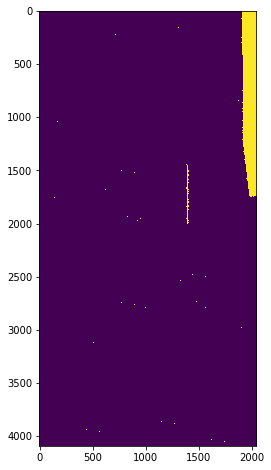

In [60]:
plt.figure(figsize=(4,8))
plt.imshow(mask1)

In [61]:
mask2 = make_ccdmask(ccd2im1,ccd2im2)

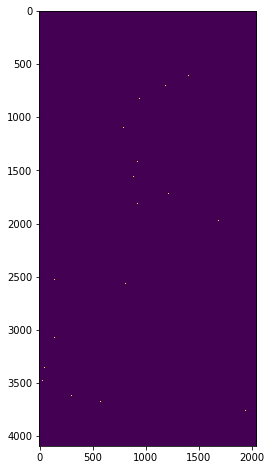

In [62]:
plt.figure(figsize=(4,8))
plt.imshow(mask2)

In [63]:
mask3 = make_ccdmask(ccd3im1,ccd3im2)

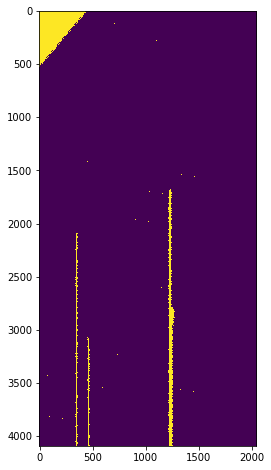

In [64]:
plt.figure(figsize=(4,8))
plt.imshow(mask3)

In [65]:
mask4 = make_ccdmask(ccd4im1,ccd4im2)

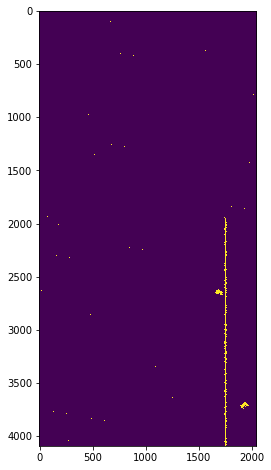

In [66]:
plt.figure(figsize=(4,8))
plt.imshow(mask4)

# Save masks a bad pixel masks

In [68]:
maskarrays = [mask1,mask2,mask3,mask4]
outfiles = ['WFCINTccdmask{}.fits'.format(i) for i in range(1,5)]
for i in range(len(maskarrays)):
    mask_as_ccd = CCDData(data=maskarrays[i].astype('uint8'), unit=u.dimensionless_unscaled)
    mask_as_ccd.header['imagetyp'] = 'flat mask'
    mask_as_ccd.write(outfiles[i],overwrite=True)


In [70]:
import numpy as np



Text(0, 0.5, 'Amplitude (m)')

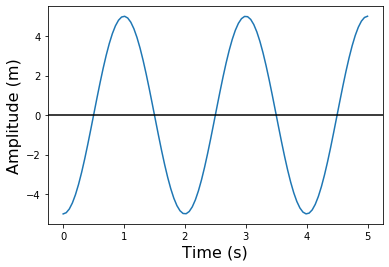

In [78]:
xl = np.linspace(0,5,100)
A = 5
phi = np.pi
w = 2*np.pi*.5
yl = A*np.cos(w*xl+phi)
plt.figure()
plt.plot(xl,yl)
plt.axhline(y=0,color='k')
plt.xlabel('Time (s)',fontsize=16)
plt.ylabel('Amplitude (m)',fontsize=16)